In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
df=pd.read_csv(r'C:\Users\adith\Downloads\pima-indians-diabetes.csv')
df.columns=col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [8]:
# Prepare data
X = df.iloc[:, :-1].values  # Features ('pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age')
y = df.iloc[:, -1].values  # Labels ('label')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [11]:
clf = DecisionTreeClassifier()

#Training the decision tree classifier. 
clf.fit(X_train, y_train)

#Predicting labels on the test set.
y_pred1 =  clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))*100)
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred1)*100)

Accuracy Score on train data:  100.0
Accuracy Score on test data:  62.33766233766234


In [14]:
#Predicting labels on the test set.
y_pred_test =  clf.predict(X_test)

y_pred_train=clf.predict(X_train)

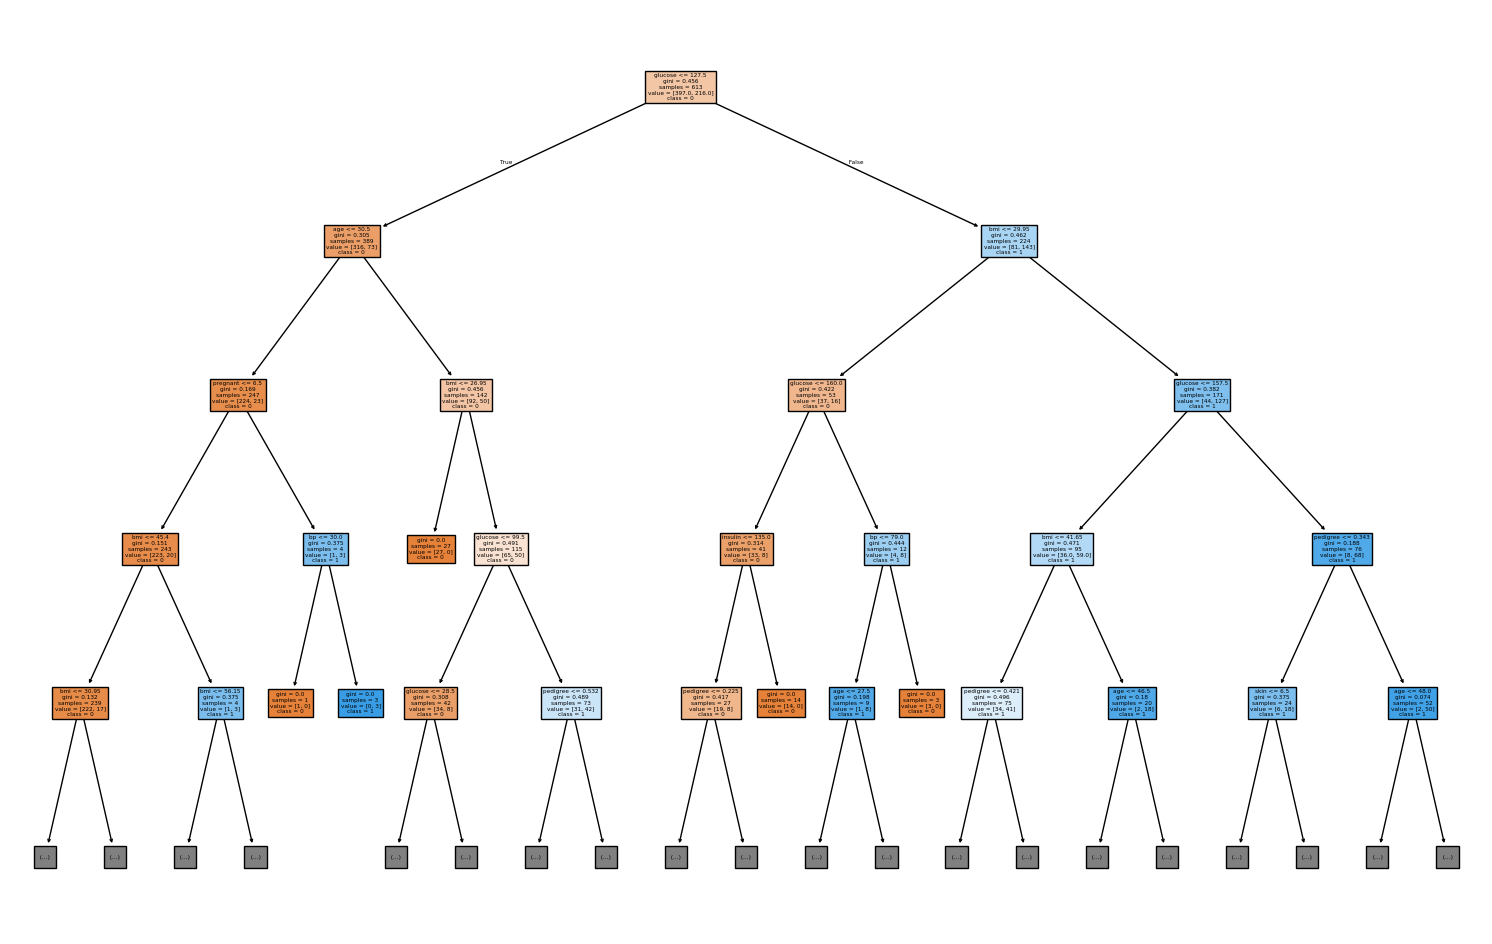

In [36]:
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt

# Convert class names to strings
classes = ['0', '1']  # Replace these with actual class names if they exist

# Plot the decision tree
plt.figure(figsize=(19, 12))
plot_tree(clf, feature_names=features, class_names=classes, filled=True, max_depth=4)
plt.show()


In [37]:
#Pre-pruning
max_depth = []
acc = []
for i in range(1,10):
 dt_classifier = DecisionTreeClassifier(max_depth=i, random_state = 20)
 dt_classifier.fit(X_train, y_train)
 pred = dt_classifier.predict(X_test)
 acc.append(accuracy_score(y_test, pred))
 max_depth.append(i)
print(max(acc))

0.7272727272727273


In [38]:
print(acc)

[0.6818181818181818, 0.7272727272727273, 0.7272727272727273, 0.7012987012987013, 0.7142857142857143, 0.6363636363636364, 0.6428571428571429, 0.6428571428571429, 0.6363636363636364]


In [39]:
depth = acc.index(max(acc)) + 1
depth

2

In [40]:
dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state = 20)
dt_classifier.fit(X_train, y_train)
pred = dt_classifier.predict(X_test)
accuracy_score(y_test, pred)

0.7272727272727273

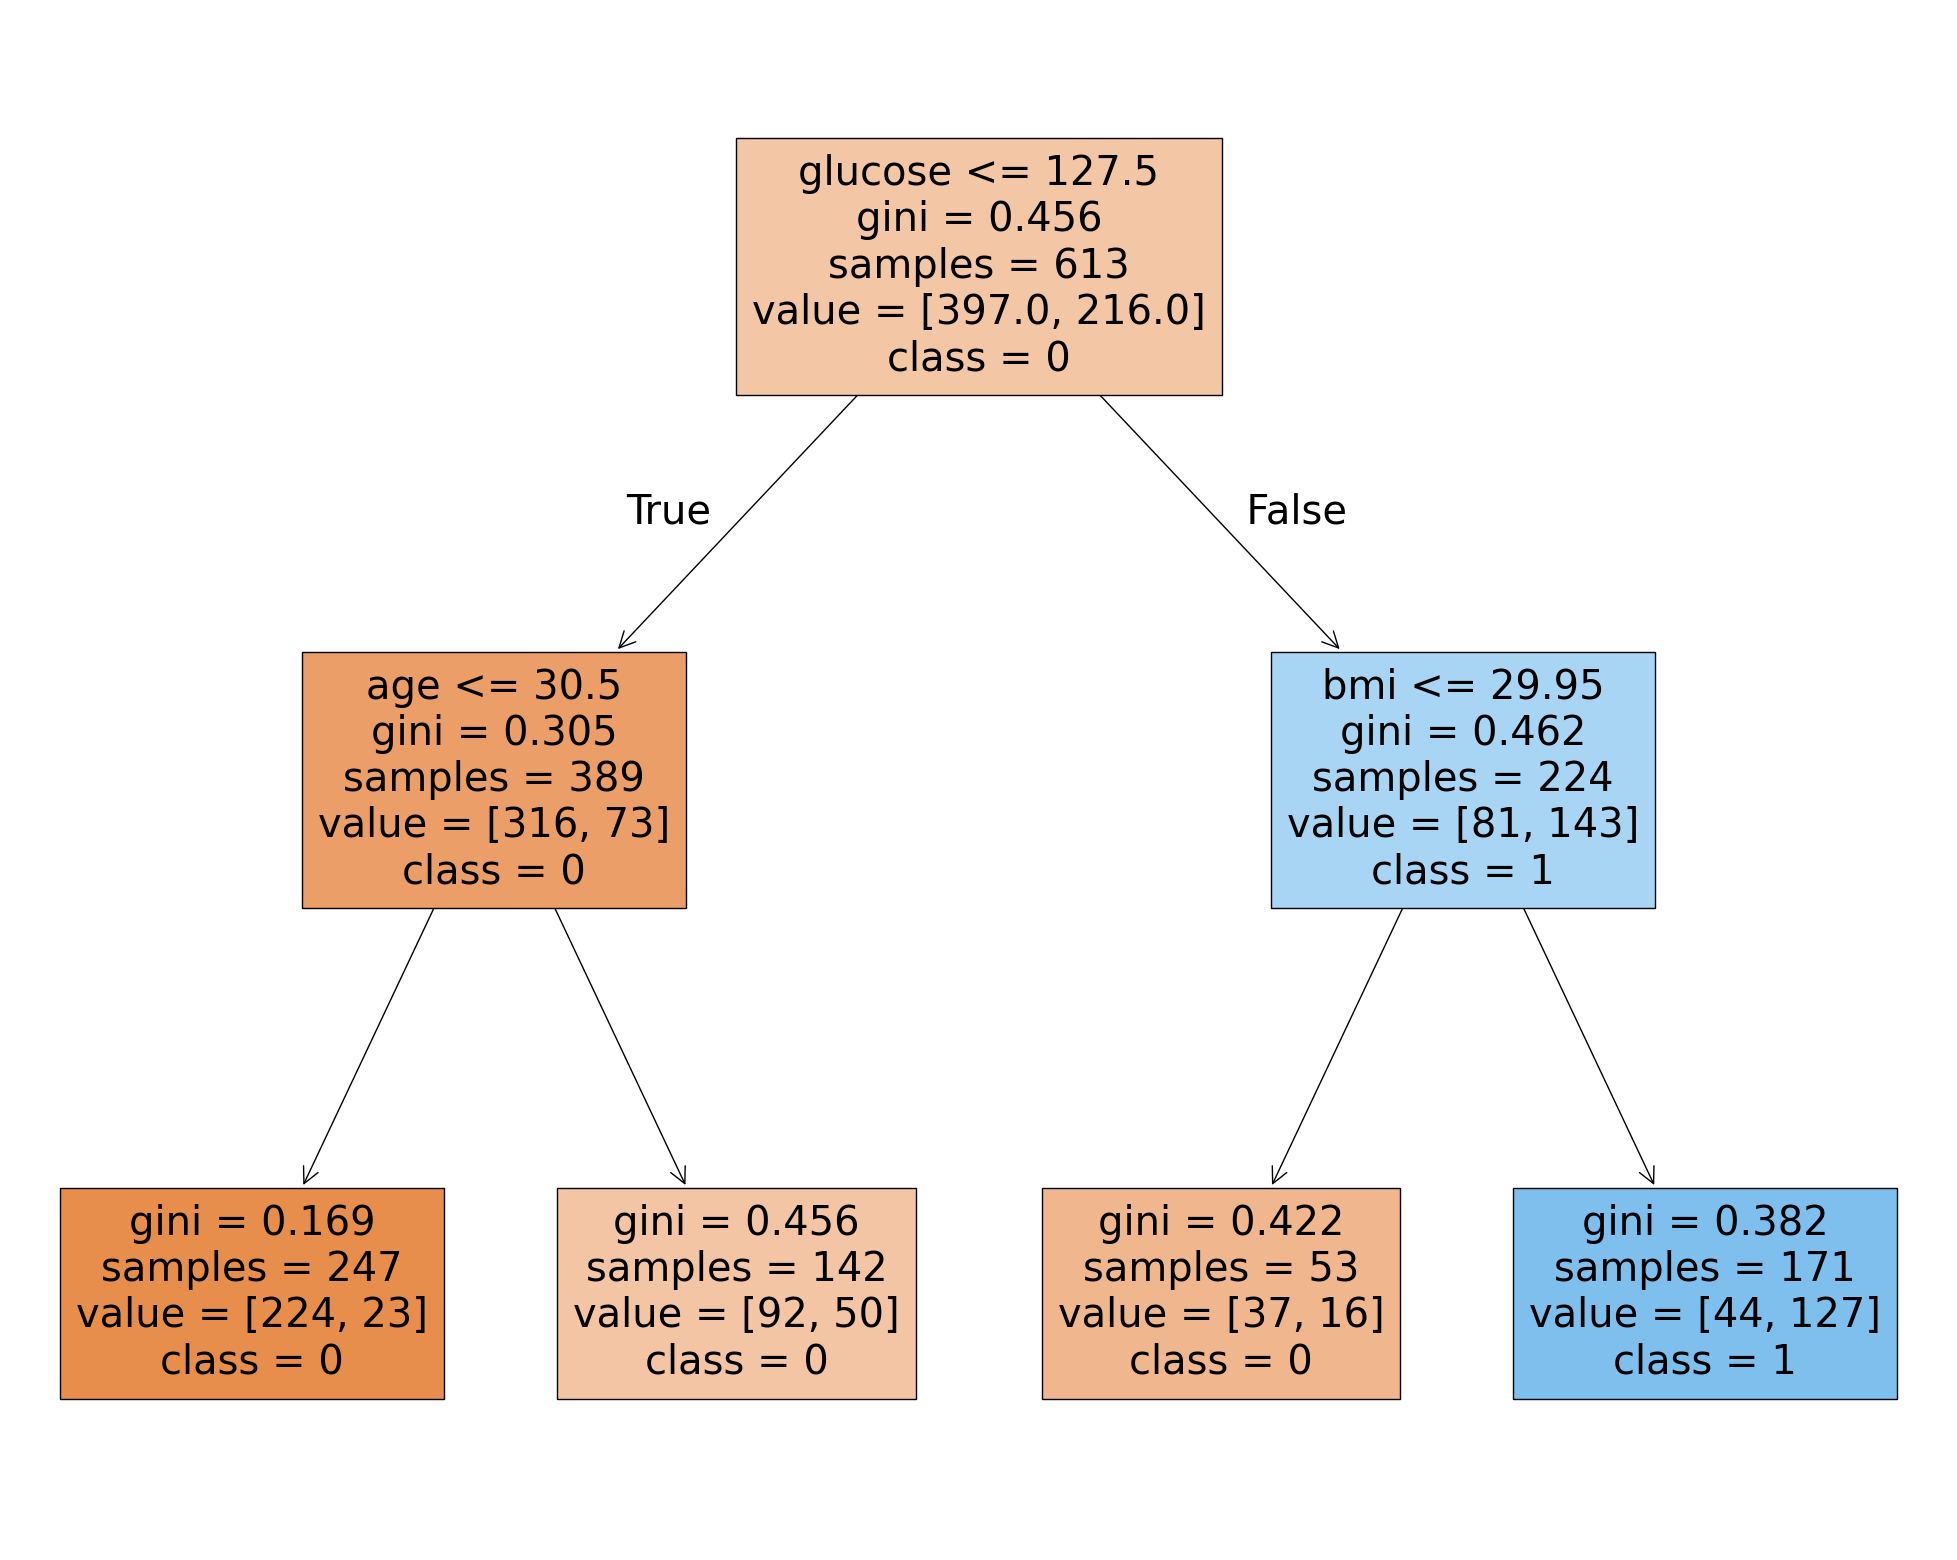

In [41]:
from sklearn.tree import plot_tree  # 
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 20))

plot_tree(dt_classifier, 
          feature_names=features,  # Replace features with your actual column names
          class_names=['0', '1'],  # Replace with string class names
          filled=True)

plt.show()


In [ ]:
#Post-pruning

In [43]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, train_size = 0.7)

clf = DecisionTreeClassifier(random_state=20)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00159915 0.00163246 0.0016791  0.00172216 0.00179104
 0.00181237 0.00183236 0.00183275 0.00223881 0.00223881 0.00232172
 0.00236911 0.00248756 0.00248756 0.00248756 0.00248756 0.0027137
 0.00282678 0.00298507 0.00298507 0.00310945 0.00312165 0.00318918
 0.00319829 0.00319829 0.0032306  0.00326493 0.00330581 0.00331675
 0.00333994 0.00365023 0.00365968 0.00378101 0.00391791 0.00394845
 0.00441423 0.00443586 0.00452284 0.00455093 0.00469251 0.00473065
 0.00555259 0.00592277 0.00683396 0.00964543 0.00976478 0.01067325
 0.01156373 0.01870892 0.02952897 0.09028007]


In [44]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=20, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

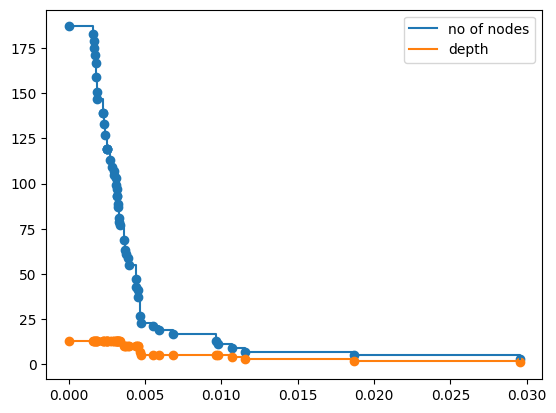

In [45]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

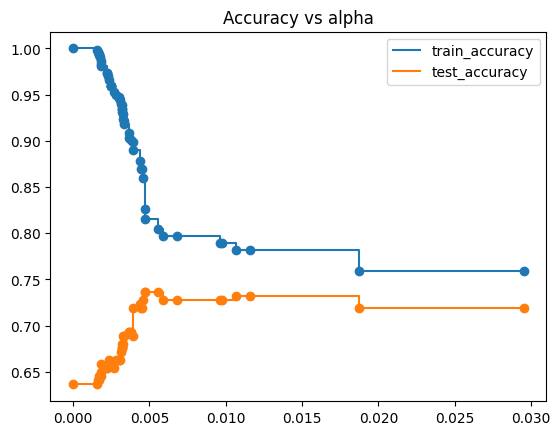

In [46]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [47]:
clf_ = DecisionTreeClassifier(random_state=20,ccp_alpha=0.05)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.7593283582089553
Test score 0.7186147186147186


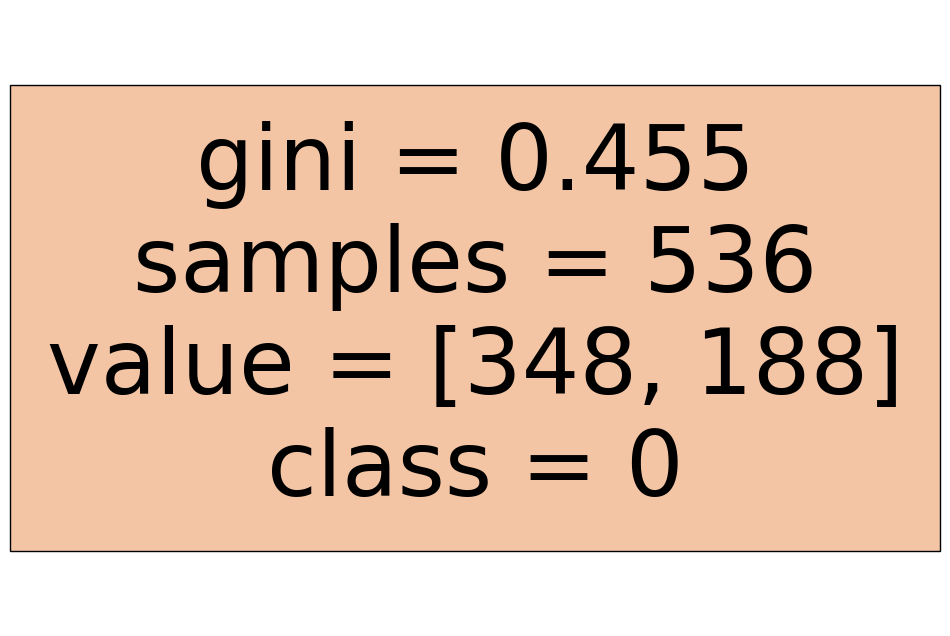

In [49]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']

# Specify class names
class_names = ['0', '1']  # Change to actual class labels

# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()
